# TensorFlow 2.0 Tutorial Part 1

This is a tutorial on the basic to advanced commands in TensorFlow version 2.0.

### Resources:

[1] Official Tensorflow documentation https://www.tensorflow.org/

[2] Tensorflow in Practice Specialization Coursera

### Table of Contents
- [Setting up TensorFlow](#setup)


- [Preprocessing ETL Data](#preprocess)
   - [Basic Preprocessing](#basicpreprocess)
       - [loading CSV, NumPy, Pandas](#csv)
       - [loading Images, Text](#images)
   - [Advanced Preprocessing](#advancedpreprocess)
       - [Data Augmentation](#dataaugment)
       - [Image Segmentation](#imagesegment)


- [Basics with Keras](#basicskeras)
   - [Basic Image Classification](#basicimage)
   - [Text classification](#textclass) 
   - [Overfit and underfit](#overunder)
   - [Save and load](#saveload)
   - [Tune Hyperparameters](#tune)
   
   
- [Using Estimators (High Level API)](#Estimators)
   - [Premade estimator](#premade)
   - [Boosted trees](#boosted) 
   - [Linear Model](#linear)


### Why would you use Tensorflow over Keras?

Keras is a neural networks library written in Python that is high-level in nature – which makes it extremely simple and intuitive to use. It works as a wrapper to low-level libraries like TensorFlow or Theano high-level neural networks library, written in Python that works as a wrapper to TensorFlow or Theano. 

Keras was developed with the objective of allowing people to write their own scripts without having to learn the backend in detail. After all, most of the users wouldn’t bother about the performance of scripts and the details of the algorithms.

However, one size does not fit all when it comes to Machine Learning applications – Keras won’t work if you need to make low-level changes to your model. For that, you need TensorFlow. Although difficult to understand, once you get a hold of the syntax, you’ll be building your models in no time. So, like everything, it all boils down to your requirements at hand. If you’re looking to fiddle around with Deep Neural Networks or just want to build a prototype – Keras is your calling. However, if you’re the one that likes to dive deep and get control of the low-level functionalities, you should spend some time exploring TensorFlow.

### Setting up TensorFlow 2.0
<a name="setup">

- To set up tensorflow in MacOS:
      
https://medium.com/@cran2367/install-and-setup-tensorflow-2-0-2c4914b9a265


- To set up tensorflow in Windows:


https://towardsdatascience.com/an-utterly-simple-guide-on-installing-tensorflow-gpu-2-0-on-windows-10-198368dc07a1
     
### Commands to check if TensorFlow is working properly

In [60]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
#eager mode allows tensorflow to run and output the results immediately without having to set up a session. e.g. with tf.session as sess: sess.run(m) where m is the tensorflow operation, run model etc
print(tf.__version__)

2.0.0-beta0


### Tensor Operations (Similar to Numpy arrays)

In [61]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

# matrix multiplication
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


### Tensors
A Tensor is a multi-dimensional array. Similar to NumPy ndarray objects, tf.Tensor objects have a data type and a shape. Additionally, tf.Tensors can reside in accelerator memory (like a GPU). TensorFlow offers a rich library of operations (tf.add, tf.matmul, tf.linalg.inv etc.) that consume and produce tf.Tensors. These operations automatically convert native Python types.



The most obvious differences between NumPy arrays and tf.Tensors are:
 - Tensors can be backed by accelerator memory (like GPU, TPU).
 - Tensors are immutable.


In [62]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


### Preprocessing ETL Data
<a name="preprocess">

#### - Basic Preprocessing
<a name="basicpreprocess">

In [63]:
import functools
import numpy as np
import tensorflow as tf

#### Loading of file (from URL)
<a name="csv">

In [64]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

# load file from URL stored in URL
train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)


You can load this using pandas, and pass the NumPy arrays to TensorFlow. If you need to scale up to a large set of files, or need a loader that integrates with TensorFlow and tf.data then use the tf.data.experimental.make_csv_dataset function:

#### Loading of file (from URL), convert into Pandas dataframe

In [65]:
import pandas as pd 

csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


Use tf.data.Dataset.from_tensor_slices to read the values from a pandas dataframe.

In [66]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

def get_dataset(file_path, **kwargs):
    dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5, # Artificially small to make examples easier to show.
      label_name=LABEL_COLUMN,
      na_value="?",
      num_epochs=1,
      ignore_errors=True, 
      **kwargs)
    return dataset


SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]


temp_dataset = get_dataset(train_file_path, 
                           select_columns=SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

example_batch, labels_batch = next(iter(temp_dataset)) 
example_batch

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


OrderedDict([('age',
              <tf.Tensor: id=2240015, shape=(5,), dtype=float32, numpy=array([26., 28., 33., 36., 34.], dtype=float32)>),
             ('n_siblings_spouses',
              <tf.Tensor: id=2240017, shape=(5,), dtype=float32, numpy=array([0., 1., 0., 0., 1.], dtype=float32)>),
             ('parch',
              <tf.Tensor: id=2240018, shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 1.], dtype=float32)>),
             ('fare',
              <tf.Tensor: id=2240016, shape=(5,), dtype=float32, numpy=array([ 7.8958, 15.5   , 12.275 , 10.5   , 14.4   ], dtype=float32)>)])

#### Loading of file from Pandas dataframe

In [67]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

# need to ensure that all entries are real numbers before converting into numpy array
target = df['target']
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

#### Load from .npz file

In [68]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

#### Load NumPy arrays with tf.data.Dataset

In [69]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))


#### Descriptive Statistics for Numeric Features

In [70]:
# takes only numeric features. leaves out 'alone', 'embark town', 'sex', 'deck', etc
desc = pd.read_csv(train_file_path).describe()
desc

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


#### Normalizing dataset

In [71]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

def normalize_numeric_data(data, mean, std):
  # Center the data
  return (data-mean)/std


# See what you just created.
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x000001F5DC87FCA8>, mean=array([ 0.38755981, 29.63130781,  0.54545455,  0.37958533, 34.38539856]), std=array([ 0.48758217, 12.51181763,  1.1510896 ,  0.79299921, 54.5977305 ])))

In [72]:
class PackNumericFeatures(object):
    def __init__(self, names):
        self.names = names

    def __call__(self, features, labels):
        numeric_features = [features.pop(name) for name in self.names]
        numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
        numeric_features = tf.stack(numeric_features, axis=-1)
        features['numeric'] = numeric_features

        return features, labels


NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

raw_train_data = get_dataset(train_file_path)

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

example_batch, labels_batch = next(iter(packed_train_data)) 


example_batch['numeric']

<tf.Tensor: id=2240143, shape=(5, 4), dtype=float32, numpy=
array([[21.    ,  0.    ,  0.    ,  8.6625],
       [28.    ,  0.    ,  0.    , 31.    ],
       [23.    ,  0.    ,  0.    ,  7.925 ],
       [35.    ,  1.    ,  0.    , 83.475 ],
       [36.    ,  1.    ,  1.    , 24.15  ]], dtype=float32)>

In [73]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)

#### One-hot encode categorical features

In [74]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}


categorical_columns = []
for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
    categorical_columns.append(tf.feature_column.indicator_column(cat_col))

# See what you just created.
categorical_columns


[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [75]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


#### Shuffle and batch the datasets

In [76]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#### Alternative to feature columns
Passing a dictionary as an input to a model is as easy as creating a matching dictionary of tf.keras.layers.Input layers, applying any pre-processing and stacking them up using the functional api. You can use this as an alternative to feature columns.

In [77]:
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

x = tf.keras.layers.Dense(10, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

### Load images
<a name="images">

This tutorial provides a simple example of how to load an image dataset using tf.data.
The dataset used in this example is distributed as directories of images, with one class of image per directory.

Steps to preprocess images:
    - Rescale images to be consistent size
    - Ensure consistent colour channels
    - Ensure that the images have a variety of backgrounds, positions, etc
    - Shuffle and Batch the images 
    
#### Method 1: Load from keras.utils.get_file

In [78]:
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os

import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [79]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

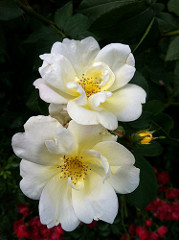

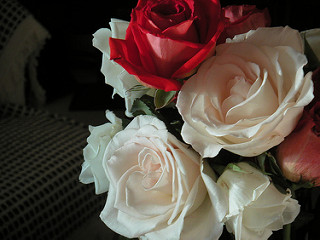

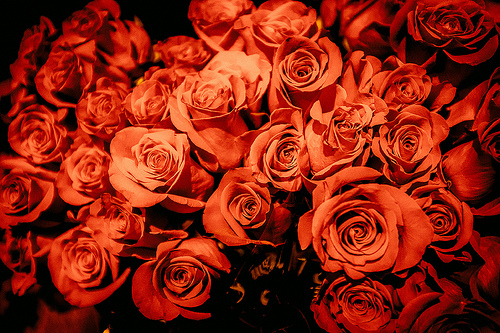

In [80]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

#### Method 2: Load using keras.preprocessing using ImageDataGenerator (Better Method)
A simple way to load images is to use tf.keras.preprocessing.

In [81]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
# initialize generator, set rescale parameter, set class parameter based on directory, set shuffle and batching

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


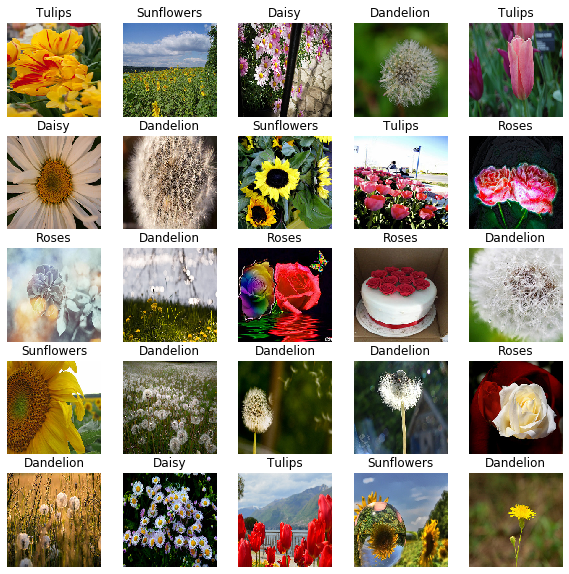

In [82]:
# Inspect a batch:

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')
        
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

#### Method 3: Load using tf.data
The above keras.preprocessing method is convienient, but has three downsides:

- It's slow. See the performance section below.
- It lacks fine-grained control.
- It is not well integrated with the rest of TensorFlow.
- To load the files as a tf.data.Dataset first create a dataset of the file paths:

In [ ]:
# list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

# for f in list_ds.take(5):
#     print(f.numpy())
    
# def get_label(file_path):
#   # convert the path to a list of path components
#   parts = tf.strings.split(file_path, os.path.sep)
#   # The second to last is the class-directory
#   return parts[-2] == CLASS_NAMES

# def decode_img(img):
#     # convert the compressed string to a 3D uint8 tensor
#     img = tf.image.decode_jpeg(img, channels=3)
#     # Use `convert_image_dtype` to convert to floats in the [0,1] range.
#     img = tf.image.convert_image_dtype(img, tf.float32)
#     # resize the image to the desired size.
#     return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

# def process_path(file_path):
#     label = get_label(file_path)
#     # load the raw data from the file as a string
#     img = tf.io.read_file(file_path)
#     img = decode_img(img)
#     return img, label

# # Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
# labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# for image, label in labeled_ds.take(1):
#     print("Image shape: ", image.numpy().shape)
#     print("Label: ", label.numpy())

### Advanced Preprocessing
<a name="advancedpreprocess">


#### Data Augmentation on Images
<a name="dataaugment">

Data augmentation is a common technique to improve results and avoid overfitting, see Overfitting and Underfitting for others.

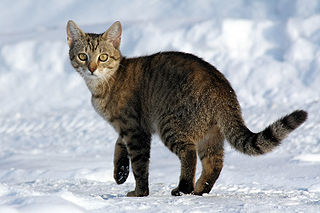

In [83]:
import PIL.Image

image_path = tf.keras.utils.get_file("cat.jpg", "https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg")
PIL.Image.open(image_path)

In [84]:
# Read and decode the image to tensor format.

image_string=tf.io.read_file(image_path)
image=tf.image.decode_jpeg(image_string,channels=3)

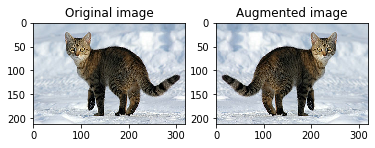

In [85]:
# A function to visualize and compare the original and augmented image side by side.

def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    
    
# Augment a single image
# Flipping the image. Flip the image either vertically or horizontally.

flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

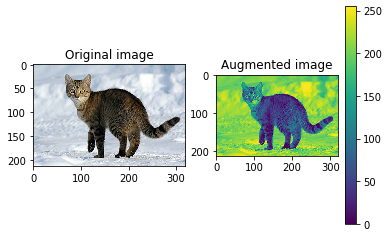

In [86]:
# Grayscale the image

grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
plt.colorbar()

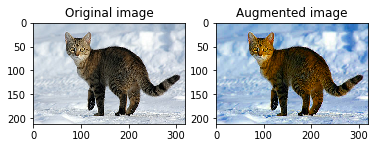

In [87]:
# Saturate the image. Saturate an image by providing a saturation factor.

saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

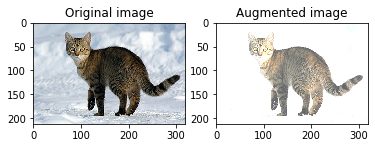

In [88]:
# Change image brightness. Change the brightness of image by providing a brightness factor.

bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

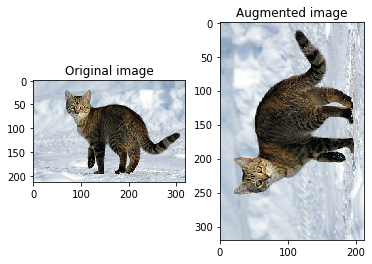

In [89]:
# Rotate the image. Rotate an image by 90 degrees.

rotated = tf.image.rot90(image)
visualize(image, rotated)

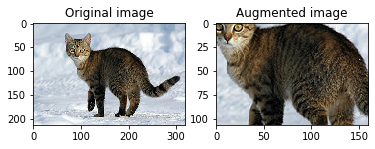

In [95]:
# Center crop the image. Crop the image from center upto the image part you desire.

cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

#### Augmenting the entire dataset

In [96]:
import tensorflow.compat.v1 as tf
import tensorflow_datasets as tfds

dataset, info =  tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples= info.splits['train'].num_examples


def convert(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    return image, label

def augment(image,label):
    image,label = convert(image, label)
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    image = tf.image.resize_with_crop_or_pad(image, 34, 34) # Add 6 pixels of padding
    image = tf.image.random_crop(image, size=[28, 28, 1]) # Random crop back to 28x28
    image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness

    return image,label

BATCH_SIZE = 64
# Only use a subset of the data so it's easier to overfit, for this tutorial
NUM_EXAMPLES = 2048
AUTOTUNE = 1
# Create the augmented dataset.

augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .take(NUM_EXAMPLES)
    .cache()
    .shuffle(num_train_examples//4)
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
) 

#### Image Segmentation
<a name="imagesegment">

#### What is image segmentation?
So far you have seen image classification, where the task of the network is to assign a label or class to an input image. However, suppose you want to know where an object is located in the image, the shape of that object, which pixel belongs to which object, etc. In this case you will want to segment the image, i.e., each pixel of the image is given a label. Thus, the task of image segmentation is to train a neural network to output a pixel-wise mask of the image. This helps in understanding the image at a much lower level, i.e., the pixel level. Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging to name a few.

The dataset consists of images, their corresponding labels, and pixel-wise masks. The masks are basically labels for each pixel. Each pixel is given one of three categories :

- Class 1 : Pixel belonging to the pet.
- Class 2 : Pixel bordering the pet.
- Class 3 : None of the above/ Surrounding pixel.

In [70]:
!pip install -q git+https://github.com/tensorflow/examples.git
!pip install -q -U tfds-nightly

In [1]:
# import tensorflow as tf

# from tensorflow_examples.models.pix2pix import pix2pix

# import tensorflow_datasets as tfds
# tfds.disable_progress_bar()

# from IPython.display import clear_output
# import matplotlib.pyplot as plt


In [2]:
# dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

In [10]:
# def normalize(input_image, input_mask):
#     input_image = tf.cast(input_image, tf.float32) / 255.0
#     input_mask -= 1
#     return input_image, input_mask

# @tf.function
# def load_image_train(datapoint):
#     input_image = tf.image.resize(datapoint['image'], (128, 128))
#     input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

#     if tf.random.uniform(()) > 0.5:
#         input_image = tf.image.flip_left_right(input_image)
#         input_mask = tf.image.flip_left_right(input_mask)

#         input_image, input_mask = normalize(input_image, input_mask)

#     return input_image, input_mask

# def load_image_test(datapoint):
#     input_image = tf.image.resize(datapoint['image'], (128, 128))
#     input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

#     input_image, input_mask = normalize(input_image, input_mask)

#     return input_image, input_mask

In [11]:
# TRAIN_LENGTH = info.splits['train'].num_examples
# BATCH_SIZE = 64
# BUFFER_SIZE = 1000
# STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE


# train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# test = dataset['test'].map(load_image_test)

# train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# test_dataset = test.batch(BATCH_SIZE)

AttributeError: in converted code:

    <ipython-input-10-c49fcb67d2d2>:9 load_image_train
        input_image = np.image.resize(datapoint['image'], (128, 128))

    AttributeError: module 'numpy' has no attribute 'image'


In [74]:
# def display(display_list):
#     plt.figure(figsize=(15, 15))

#     title = ['Input Image', 'True Mask', 'Predicted Mask']

#     for i in range(len(display_list)):
#         plt.subplot(1, len(display_list), i+1)
#         plt.title(title[i])
#         plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
#         plt.axis('off')
#     plt.show()

# for image, mask in train.take(1):
#     sample_image, sample_mask = image, mask
# display([sample_image, sample_mask])

#### Loading Text
<a name="images">
  

In [12]:
import tensorflow_datasets as tfds
import os

In [13]:
DIRECTORY_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
FILE_NAMES = ['cowper.txt', 'derby.txt', 'butler.txt']

for name in FILE_NAMES:
    text_dir = tf.keras.utils.get_file(name, origin=DIRECTORY_URL+name)

parent_dir = os.path.dirname(text_dir)

parent_dir

'C:\\Users\\John\\.keras\\datasets'

#### Load text into datasets
Iterate through the files, loading each one into its own dataset.

Each example needs to be individually labeled, so use tf.data.Dataset.map to apply a labeler function to each one. This will iterate over every example in the dataset, returning (example, label) pairs.

In [14]:
def labeler(example, index):
    return example, tf.cast(index, tf.int64)  

labeled_data_sets = []

for i, file_name in enumerate(FILE_NAMES):
    lines_dataset = tf.data.TextLineDataset(os.path.join(parent_dir, file_name))
    labeled_dataset = lines_dataset.map(lambda ex: labeler(ex, i))
    labeled_data_sets.append(labeled_dataset)

In [15]:
BUFFER_SIZE = 50000
BATCH_SIZE = 64
TAKE_SIZE = 5000

all_labeled_data = labeled_data_sets[0]
for labeled_dataset in labeled_data_sets[1:]:
    all_labeled_data = all_labeled_data.concatenate(labeled_dataset)

all_labeled_data = all_labeled_data.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [16]:
# You can use tf.data.Dataset.take and print to see what the (example, label) pairs look like. The numpy property shows each Tensor's value.

for ex in all_labeled_data.take(5):
    print(ex)

(<tf.Tensor: id=654, shape=(), dtype=string, numpy=b'Hear now me also, on whose aching heart'>, <tf.Tensor: id=655, shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: id=658, shape=(), dtype=string, numpy=b'The son of Tydeus, whom with winged haste'>, <tf.Tensor: id=659, shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: id=662, shape=(), dtype=string, numpy=b'in hand to hand fighting can delight the heart of Mars; howbeit I would'>, <tf.Tensor: id=663, shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: id=666, shape=(), dtype=string, numpy=b"But when he enter'd Priam's palace, built">, <tf.Tensor: id=667, shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: id=670, shape=(), dtype=string, numpy=b'"Hear me, God of the silver bow! whose care'>, <tf.Tensor: id=671, shape=(), dtype=int64, numpy=1>)


### Encode text lines as numbers
Machine learning models work on numbers, not words, so the string values need to be converted into lists of numbers. To do that, map each unique word to a unique integer.

### Build vocabulary
First, build a vocabulary by tokenizing the text into a collection of individual unique words. There are a few ways to do this in both TensorFlow and Python. For this tutorial:

- Iterate over each example's numpy value.
- Use tfds.features.text.Tokenizer to split it into tokens.
- Collect these tokens into a Python set, to remove duplicates.
- Get the size of the vocabulary for later use.

In [17]:
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for text_tensor, _ in all_labeled_data:
    some_tokens = tokenizer.tokenize(text_tensor.numpy())
    vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
vocab_size

17178

### Encode examples
Create an encoder by passing the vocabulary_set to tfds.features.text.TokenTextEncoder. The encoder's encode method takes in a string of text and returns a list of integers.

In [18]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

# You can try this on a single line to see what the output looks like.

example_text = next(iter(all_labeled_data))[0].numpy()
print(example_text)

encoded_example = encoder.encode(example_text)
print(encoded_example)

b'Hear now me also, on whose aching heart'
[16060, 7470, 834, 1576, 53, 395, 13351, 7420]


In [19]:
# Now run the encoder on the dataset by wrapping it in tf.py_function and passing that to the dataset's map method.

def encode(text_tensor, label):
    encoded_text = encoder.encode(text_tensor.numpy())
    return encoded_text, label

# You want to use Dataset.map to apply this function to each element of the dataset. Dataset.map runs in graph mode.

# Graph tensors do not have a value.
# In graph mode you can only use TensorFlow Ops and functions.
# So you can't .map this function directly: You need to wrap it in a tf.py_function. The tf.py_function will pass regular tensors (with a value and a .numpy() method to access it), to the wrapped python function.

def encode_map_fn(text, label):
  # py_func doesn't set the shape of the returned tensors.
    encoded_text, label = tf.py_function(encode, 
                                       inp=[text, label], 
                                       Tout=(tf.int64, tf.int64))

  # `tf.data.Datasets` work best if all components have a shape set
  #  so set the shapes manually: 
    encoded_text.set_shape([None])
    label.set_shape([])

    return encoded_text, label


all_encoded_data = all_labeled_data.map(encode_map_fn)

### Basics with Keras
<a name="basicskeras">
    
### Basic Image Classification (DNN)
<a name="basicimage">

In [20]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

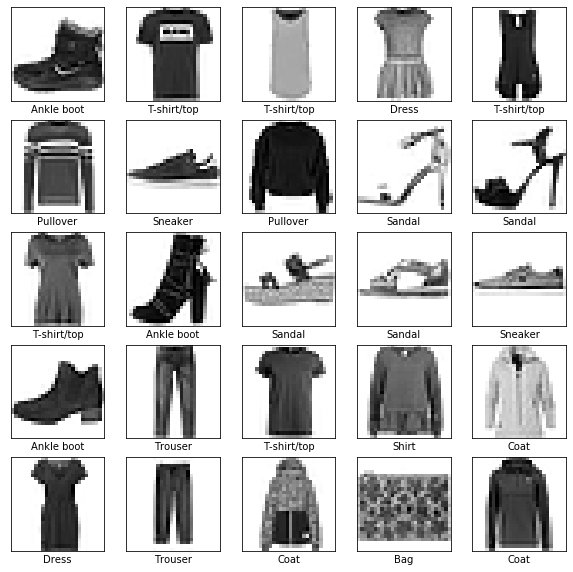

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - ETA: 1:37 - loss: 2.4376 - accuracy: 0.15 - ETA: 5s - loss: 1.2631 - accuracy: 0.5938 - ETA: 4s - loss: 1.0044 - accuracy: 0.67 - ETA: 3s - loss: 0.8974 - accuracy: 0.70 - ETA: 3s - loss: 0.8495 - accuracy: 0.71 - ETA: 3s - loss: 0.8009 - accuracy: 0.73 - ETA: 2s - loss: 0.7621 - accuracy: 0.74 - ETA: 2s - loss: 0.7367 - accuracy: 0.75 - ETA: 2s - loss: 0.7146 - accuracy: 0.75 - ETA: 2s - loss: 0.6916 - accuracy: 0.76 - ETA: 2s - loss: 0.6739 - accuracy: 0.77 - ETA: 2s - loss: 0.6528 - accuracy: 0.77 - ETA: 2s - loss: 0.6383 - accuracy: 0.78 - ETA: 2s - loss: 0.6287 - accuracy: 0.78 - ETA: 2s - loss: 0.6164 - accuracy: 0.78 - ETA: 2s - loss: 0.6057 - accuracy: 0.79 - ETA: 1s - loss: 0.6020 - accuracy: 0.79 - ETA: 1s - loss: 0.5955 - accuracy: 0.79 - ETA: 1s - loss: 0.5892 - accuracy: 0.79 - ETA: 1s - loss: 0.5858 - accuracy: 0.79 - ETA: 1s - loss: 0.5792 - accuracy: 0.79 - ETA: 1s - loss: 0.5684 - accuracy

60000/60000 [==============================] - ETA: 9s - loss: 0.1947 - accuracy: 0.96 - ETA: 2s - loss: 0.2817 - accuracy: 0.89 - ETA: 2s - loss: 0.2965 - accuracy: 0.88 - ETA: 2s - loss: 0.3118 - accuracy: 0.88 - ETA: 2s - loss: 0.3106 - accuracy: 0.88 - ETA: 2s - loss: 0.3108 - accuracy: 0.88 - ETA: 2s - loss: 0.3140 - accuracy: 0.88 - ETA: 2s - loss: 0.3080 - accuracy: 0.88 - ETA: 2s - loss: 0.3099 - accuracy: 0.88 - ETA: 2s - loss: 0.3082 - accuracy: 0.88 - ETA: 2s - loss: 0.3087 - accuracy: 0.88 - ETA: 2s - loss: 0.3120 - accuracy: 0.88 - ETA: 2s - loss: 0.3122 - accuracy: 0.88 - ETA: 2s - loss: 0.3097 - accuracy: 0.88 - ETA: 2s - loss: 0.3122 - accuracy: 0.88 - ETA: 1s - loss: 0.3099 - accuracy: 0.88 - ETA: 1s - loss: 0.3106 - accuracy: 0.88 - ETA: 1s - loss: 0.3093 - accuracy: 0.88 - ETA: 1s - loss: 0.3067 - accuracy: 0.88 - ETA: 1s - loss: 0.3079 - accuracy: 0.88 - ETA: 1s - loss: 0.3074 - accuracy: 0.88 - ETA: 1s - loss: 0.3074 - accuracy: 0.88 - ETA: 1s - loss: 0.3073 - accu

60000/60000 [==============================] - ETA: 7s - loss: 0.1807 - accuracy: 0.90 - ETA: 2s - loss: 0.2908 - accuracy: 0.89 - ETA: 2s - loss: 0.2653 - accuracy: 0.90 - ETA: 2s - loss: 0.2621 - accuracy: 0.90 - ETA: 2s - loss: 0.2634 - accuracy: 0.90 - ETA: 2s - loss: 0.2631 - accuracy: 0.90 - ETA: 2s - loss: 0.2659 - accuracy: 0.90 - ETA: 2s - loss: 0.2663 - accuracy: 0.90 - ETA: 2s - loss: 0.2646 - accuracy: 0.90 - ETA: 2s - loss: 0.2683 - accuracy: 0.90 - ETA: 2s - loss: 0.2647 - accuracy: 0.90 - ETA: 2s - loss: 0.2672 - accuracy: 0.90 - ETA: 2s - loss: 0.2663 - accuracy: 0.90 - ETA: 2s - loss: 0.2643 - accuracy: 0.90 - ETA: 2s - loss: 0.2631 - accuracy: 0.90 - ETA: 1s - loss: 0.2663 - accuracy: 0.90 - ETA: 1s - loss: 0.2675 - accuracy: 0.90 - ETA: 1s - loss: 0.2681 - accuracy: 0.90 - ETA: 1s - loss: 0.2670 - accuracy: 0.90 - ETA: 1s - loss: 0.2677 - accuracy: 0.90 - ETA: 1s - loss: 0.2679 - accuracy: 0.90 - ETA: 1s - loss: 0.2683 - accuracy: 0.90 - ETA: 1s - loss: 0.2669 - accu

60000/60000 [==============================] - ETA: 5s - loss: 0.2378 - accuracy: 0.90 - ETA: 2s - loss: 0.2472 - accuracy: 0.90 - ETA: 2s - loss: 0.2294 - accuracy: 0.91 - ETA: 2s - loss: 0.2344 - accuracy: 0.91 - ETA: 2s - loss: 0.2356 - accuracy: 0.91 - ETA: 2s - loss: 0.2448 - accuracy: 0.90 - ETA: 2s - loss: 0.2382 - accuracy: 0.91 - ETA: 2s - loss: 0.2365 - accuracy: 0.91 - ETA: 2s - loss: 0.2357 - accuracy: 0.91 - ETA: 2s - loss: 0.2374 - accuracy: 0.91 - ETA: 2s - loss: 0.2366 - accuracy: 0.91 - ETA: 1s - loss: 0.2344 - accuracy: 0.91 - ETA: 1s - loss: 0.2340 - accuracy: 0.91 - ETA: 1s - loss: 0.2358 - accuracy: 0.91 - ETA: 1s - loss: 0.2349 - accuracy: 0.91 - ETA: 1s - loss: 0.2368 - accuracy: 0.91 - ETA: 1s - loss: 0.2373 - accuracy: 0.91 - ETA: 1s - loss: 0.2384 - accuracy: 0.91 - ETA: 1s - loss: 0.2383 - accuracy: 0.91 - ETA: 1s - loss: 0.2364 - accuracy: 0.91 - ETA: 1s - loss: 0.2363 - accuracy: 0.91 - ETA: 1s - loss: 0.2370 - accuracy: 0.91 - ETA: 1s - loss: 0.2369 - accu

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3295 - accuracy: 0.8890

Test accuracy: 0.889


In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

9

### Text classification
<a name="textclass">

### Text classification with preprocessed text: Movie reviews

In [25]:
import tensorflow_datasets as tfds

(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

In [26]:
# text encoder to reversibly encode any string:
encoder = info.features['text'].encoder
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [27]:
sample_string = 'Hello TensorFlow.'
encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))
original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

assert original_string == sample_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [28]:
for train_example, train_label in train_data.take(1):
    print('Encoded text:', train_example[:10].numpy())
    print('Label:', train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


In [29]:
encoder.decode(train_example)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [30]:
BUFFER_SIZE = 1000

train_batches = train_data.shuffle(BUFFER_SIZE).padded_batch(32, padded_shapes=((None,), ()))
test_batches = test_data.padded_batch(32, padded_shapes=((None,), ()))

In [31]:
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)

Batch shape: (32, 797)
label shape: (32,)
Batch shape: (32, 1470)
label shape: (32,)


In [32]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)])

model.summary()

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10


    171/Unknown - 0s 388ms/step - loss: 0.6931 - accuracy: 0.531 - 0s 234ms/step - loss: 0.6934 - accuracy: 0.453 - 1s 181ms/step - loss: 0.6934 - accuracy: 0.406 - 1s 157ms/step - loss: 0.6934 - accuracy: 0.468 - 1s 143ms/step - loss: 0.6934 - accuracy: 0.500 - 1s 132ms/step - loss: 0.6935 - accuracy: 0.515 - 1s 124ms/step - loss: 0.6934 - accuracy: 0.517 - 1s 118ms/step - loss: 0.6934 - accuracy: 0.515 - 1s 114ms/step - loss: 0.6934 - accuracy: 0.524 - 1s 111ms/step - loss: 0.6933 - accuracy: 0.521 - 1s 108ms/step - loss: 0.6933 - accuracy: 0.517 - 1s 106ms/step - loss: 0.6933 - accuracy: 0.505 - 1s 105ms/step - loss: 0.6933 - accuracy: 0.500 - 1s 103ms/step - loss: 0.6933 - accuracy: 0.495 - 2s 101ms/step - loss: 0.6933 - accuracy: 0.495 - 2s 100ms/step - loss: 0.6933 - accuracy: 0.494 - 2s 99ms/step - loss: 0.6933 - accuracy: 0.498 - 2s 98ms/step - loss: 0.6933 - accuracy: 0.49 - 2s 97ms/step - loss: 0.6933 - accuracy: 0.49 - 2s 96ms/step - loss: 0.6932 - accuracy: 0.49 - 2s 95ms/s

    338/Unknown - 15s 85ms/step - loss: 0.6923 - accuracy: 0.499 - 15s 85ms/step - loss: 0.6923 - accuracy: 0.499 - 15s 85ms/step - loss: 0.6923 - accuracy: 0.499 - 15s 86ms/step - loss: 0.6923 - accuracy: 0.499 - 15s 86ms/step - loss: 0.6923 - accuracy: 0.498 - 15s 86ms/step - loss: 0.6923 - accuracy: 0.498 - 15s 86ms/step - loss: 0.6922 - accuracy: 0.498 - 15s 86ms/step - loss: 0.6922 - accuracy: 0.498 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.498 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.498 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.498 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.498 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.498 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.498 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.497 - 16s 87ms/step - loss: 0.6922 - accuracy: 0.497 - 16s 86ms/step - loss: 0.6922 - accuracy: 0.497 - 16s 86ms/step - loss: 0.6922 - accuracy: 0.497 - 16s 86ms/step - loss: 0.6922 - accuracy: 0.497 - 16s 86ms/step - loss: 0.6922 - accuracy: 0.497 - 16

    505/Unknown - 27s 79ms/step - loss: 0.6908 - accuracy: 0.498 - 27s 79ms/step - loss: 0.6908 - accuracy: 0.498 - 27s 79ms/step - loss: 0.6908 - accuracy: 0.498 - 27s 79ms/step - loss: 0.6907 - accuracy: 0.498 - 27s 79ms/step - loss: 0.6907 - accuracy: 0.498 - 27s 79ms/step - loss: 0.6907 - accuracy: 0.498 - 27s 79ms/step - loss: 0.6907 - accuracy: 0.499 - 27s 79ms/step - loss: 0.6907 - accuracy: 0.499 - 27s 79ms/step - loss: 0.6907 - accuracy: 0.499 - 27s 79ms/step - loss: 0.6907 - accuracy: 0.499 - 28s 79ms/step - loss: 0.6907 - accuracy: 0.498 - 28s 79ms/step - loss: 0.6906 - accuracy: 0.499 - 28s 79ms/step - loss: 0.6906 - accuracy: 0.499 - 28s 79ms/step - loss: 0.6906 - accuracy: 0.499 - 28s 79ms/step - loss: 0.6907 - accuracy: 0.499 - 28s 79ms/step - loss: 0.6907 - accuracy: 0.500 - 28s 79ms/step - loss: 0.6907 - accuracy: 0.500 - 28s 79ms/step - loss: 0.6907 - accuracy: 0.500 - 28s 79ms/step - loss: 0.6906 - accuracy: 0.500 - 28s 79ms/step - loss: 0.6906 - accuracy: 0.500 - 28

    672/Unknown - 38s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 38s 75ms/step - loss: 0.6883 - accuracy: 0.503 - 38s 75ms/step - loss: 0.6883 - accuracy: 0.503 - 38s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 38s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 38s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 38s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 38s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6883 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6882 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6882 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6882 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6882 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6882 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6881 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6881 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6881 - accuracy: 0.502 - 39s 75ms/step - loss: 0.6881 - accuracy: 0.502 - 39s 74ms/step - loss: 0.6881 - accuracy: 0.502 - 39

782/782 [==============================]0.6854 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6853 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6853 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6853 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6853 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6852 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6853 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6852 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6852 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6852 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6852 - accuracy: 0.500 - 48s 71ms/step - loss: 0.6852 - accuracy: 0.500 - 49s 71ms/step - loss: 0.6851 - accuracy: 0.500 - 49s 71ms/step - loss: 0.6851 - accuracy: 0.501 - 49s 71ms/step - loss: 0.6851 - accuracy: 0.501 - 49s 71ms/step - loss: 0.6851 - accuracy: 0.501 - 49s 71ms/step - loss: 0.6851 - accuracy: 0.501 - 49s 71ms/step - loss: 0.6850 - accuracy: 0.500 - 49s 71ms/step - loss: 0.6850 - accuracy: 0.501 - 49s 71ms/step - loss: 0.6850 - accuracy: 0.501 - 49

782/782 [==============================] - ETA: 34s - loss: 0.6686 - accuracy: 0.531 - ETA: 14s - loss: 0.6623 - accuracy: 0.500 - ETA: 12s - loss: 0.6607 - accuracy: 0.525 - ETA: 10s - loss: 0.6607 - accuracy: 0.497 - ETA: 10s - loss: 0.6616 - accuracy: 0.500 - ETA: 9s - loss: 0.6604 - accuracy: 0.506 - ETA: 10s - loss: 0.6623 - accuracy: 0.509 - ETA: 9s - loss: 0.6620 - accuracy: 0.506 - ETA: 9s - loss: 0.6605 - accuracy: 0.50 - ETA: 9s - loss: 0.6595 - accuracy: 0.50 - ETA: 9s - loss: 0.6594 - accuracy: 0.50 - ETA: 10s - loss: 0.6594 - accuracy: 0.511 - ETA: 9s - loss: 0.6591 - accuracy: 0.512 - ETA: 9s - loss: 0.6593 - accuracy: 0.50 - ETA: 9s - loss: 0.6589 - accuracy: 0.50 - ETA: 9s - loss: 0.6585 - accuracy: 0.50 - ETA: 9s - loss: 0.6588 - accuracy: 0.50 - ETA: 9s - loss: 0.6591 - accuracy: 0.51 - ETA: 9s - loss: 0.6589 - accuracy: 0.51 - ETA: 9s - loss: 0.6587 - accuracy: 0.51 - ETA: 9s - loss: 0.6592 - accuracy: 0.51 - ETA: 9s - loss: 0.6590 - accuracy: 0.51 - ETA: 9s - loss: 

615/782 [======================>.......] - ETA: 38s - loss: 0.5886 - accuracy: 0.687 - ETA: 16s - loss: 0.5796 - accuracy: 0.662 - ETA: 14s - loss: 0.5745 - accuracy: 0.684 - ETA: 12s - loss: 0.5730 - accuracy: 0.668 - ETA: 12s - loss: 0.5762 - accuracy: 0.663 - ETA: 12s - loss: 0.5816 - accuracy: 0.651 - ETA: 12s - loss: 0.5797 - accuracy: 0.655 - ETA: 11s - loss: 0.5853 - accuracy: 0.643 - ETA: 11s - loss: 0.5861 - accuracy: 0.632 - ETA: 11s - loss: 0.5819 - accuracy: 0.635 - ETA: 11s - loss: 0.5803 - accuracy: 0.628 - ETA: 11s - loss: 0.5790 - accuracy: 0.625 - ETA: 11s - loss: 0.5780 - accuracy: 0.629 - ETA: 11s - loss: 0.5793 - accuracy: 0.628 - ETA: 11s - loss: 0.5776 - accuracy: 0.629 - ETA: 11s - loss: 0.5789 - accuracy: 0.620 - ETA: 11s - loss: 0.5781 - accuracy: 0.616 - ETA: 11s - loss: 0.5768 - accuracy: 0.617 - ETA: 10s - loss: 0.5766 - accuracy: 0.617 - ETA: 10s - loss: 0.5781 - accuracy: 0.618 - ETA: 11s - loss: 0.5796 - accuracy: 0.618 - ETA: 10s - loss: 0.5795 - accurac

782/782 [==============================] - ETA: 3s - loss: 0.5502 - accuracy: 0.65 - ETA: 2s - loss: 0.5502 - accuracy: 0.65 - ETA: 2s - loss: 0.5501 - accuracy: 0.65 - ETA: 2s - loss: 0.5500 - accuracy: 0.65 - ETA: 2s - loss: 0.5497 - accuracy: 0.65 - ETA: 2s - loss: 0.5495 - accuracy: 0.65 - ETA: 2s - loss: 0.5490 - accuracy: 0.65 - ETA: 2s - loss: 0.5487 - accuracy: 0.65 - ETA: 2s - loss: 0.5487 - accuracy: 0.65 - ETA: 2s - loss: 0.5484 - accuracy: 0.65 - ETA: 2s - loss: 0.5478 - accuracy: 0.65 - ETA: 2s - loss: 0.5477 - accuracy: 0.65 - ETA: 2s - loss: 0.5479 - accuracy: 0.65 - ETA: 2s - loss: 0.5475 - accuracy: 0.65 - ETA: 1s - loss: 0.5473 - accuracy: 0.65 - ETA: 1s - loss: 0.5473 - accuracy: 0.65 - ETA: 1s - loss: 0.5471 - accuracy: 0.65 - ETA: 1s - loss: 0.5471 - accuracy: 0.65 - ETA: 1s - loss: 0.5467 - accuracy: 0.65 - ETA: 1s - loss: 0.5465 - accuracy: 0.65 - ETA: 1s - loss: 0.5463 - accuracy: 0.65 - ETA: 1s - loss: 0.5462 - accuracy: 0.65 - ETA: 1s - loss: 0.5461 - accuracy

703/782 [=========================>....] - ETA: 49s - loss: 0.4980 - accuracy: 0.750 - ETA: 19s - loss: 0.5020 - accuracy: 0.762 - ETA: 15s - loss: 0.4937 - accuracy: 0.795 - ETA: 14s - loss: 0.4943 - accuracy: 0.776 - ETA: 13s - loss: 0.4990 - accuracy: 0.761 - ETA: 12s - loss: 0.5085 - accuracy: 0.748 - ETA: 12s - loss: 0.5082 - accuracy: 0.746 - ETA: 12s - loss: 0.5158 - accuracy: 0.734 - ETA: 12s - loss: 0.5152 - accuracy: 0.725 - ETA: 12s - loss: 0.5134 - accuracy: 0.728 - ETA: 12s - loss: 0.5081 - accuracy: 0.729 - ETA: 12s - loss: 0.5048 - accuracy: 0.728 - ETA: 12s - loss: 0.5062 - accuracy: 0.729 - ETA: 12s - loss: 0.5041 - accuracy: 0.730 - ETA: 12s - loss: 0.5058 - accuracy: 0.731 - ETA: 12s - loss: 0.5031 - accuracy: 0.731 - ETA: 12s - loss: 0.5043 - accuracy: 0.726 - ETA: 11s - loss: 0.5041 - accuracy: 0.724 - ETA: 11s - loss: 0.5020 - accuracy: 0.723 - ETA: 11s - loss: 0.5021 - accuracy: 0.724 - ETA: 11s - loss: 0.5045 - accuracy: 0.723 - ETA: 11s - loss: 0.5070 - accurac

782/782 [==============================] - ETA: 1s - loss: 0.4786 - accuracy: 0.74 - ETA: 1s - loss: 0.4784 - accuracy: 0.74 - ETA: 1s - loss: 0.4782 - accuracy: 0.74 - ETA: 0s - loss: 0.4778 - accuracy: 0.74 - ETA: 0s - loss: 0.4775 - accuracy: 0.74 - ETA: 0s - loss: 0.4775 - accuracy: 0.74 - ETA: 0s - loss: 0.4775 - accuracy: 0.74 - ETA: 0s - loss: 0.4774 - accuracy: 0.74 - ETA: 0s - loss: 0.4776 - accuracy: 0.74 - ETA: 0s - loss: 0.4773 - accuracy: 0.74 - ETA: 0s - loss: 0.4771 - accuracy: 0.74 - ETA: 0s - loss: 0.4769 - accuracy: 0.74 - ETA: 0s - loss: 0.4771 - accuracy: 0.74 - ETA: 0s - loss: 0.4770 - accuracy: 0.74 - ETA: 0s - loss: 0.4766 - accuracy: 0.74 - ETA: 0s - loss: 0.4764 - accuracy: 0.74 - ETA: 0s - loss: 0.4764 - accuracy: 0.74 - ETA: 0s - loss: 0.4760 - accuracy: 0.74 - ETA: 0s - loss: 0.4758 - accuracy: 0.74 - ETA: 0s - loss: 0.4758 - accuracy: 0.74 - ETA: 0s - loss: 0.4755 - accuracy: 0.75 - 12s 16ms/step - loss: 0.4757 - accuracy: 0.7500 - val_loss: 0.4849 - val_ac

665/782 [========================>.....] - ETA: 41s - loss: 0.4191 - accuracy: 0.812 - ETA: 20s - loss: 0.4180 - accuracy: 0.812 - ETA: 17s - loss: 0.4206 - accuracy: 0.834 - ETA: 15s - loss: 0.4324 - accuracy: 0.823 - ETA: 13s - loss: 0.4419 - accuracy: 0.797 - ETA: 13s - loss: 0.4450 - accuracy: 0.794 - ETA: 12s - loss: 0.4500 - accuracy: 0.790 - ETA: 12s - loss: 0.4566 - accuracy: 0.780 - ETA: 12s - loss: 0.4573 - accuracy: 0.777 - ETA: 12s - loss: 0.4550 - accuracy: 0.781 - ETA: 12s - loss: 0.4486 - accuracy: 0.781 - ETA: 12s - loss: 0.4451 - accuracy: 0.782 - ETA: 12s - loss: 0.4460 - accuracy: 0.785 - ETA: 11s - loss: 0.4458 - accuracy: 0.783 - ETA: 11s - loss: 0.4441 - accuracy: 0.784 - ETA: 11s - loss: 0.4424 - accuracy: 0.785 - ETA: 11s - loss: 0.4439 - accuracy: 0.783 - ETA: 11s - loss: 0.4410 - accuracy: 0.785 - ETA: 11s - loss: 0.4406 - accuracy: 0.786 - ETA: 11s - loss: 0.4416 - accuracy: 0.784 - ETA: 11s - loss: 0.4444 - accuracy: 0.785 - ETA: 11s - loss: 0.4470 - accurac

782/782 [==============================] - ETA: 1s - loss: 0.4257 - accuracy: 0.79 - ETA: 1s - loss: 0.4256 - accuracy: 0.79 - ETA: 1s - loss: 0.4256 - accuracy: 0.79 - ETA: 1s - loss: 0.4257 - accuracy: 0.79 - ETA: 1s - loss: 0.4257 - accuracy: 0.79 - ETA: 1s - loss: 0.4254 - accuracy: 0.79 - ETA: 1s - loss: 0.4252 - accuracy: 0.79 - ETA: 1s - loss: 0.4251 - accuracy: 0.79 - ETA: 1s - loss: 0.4249 - accuracy: 0.79 - ETA: 1s - loss: 0.4249 - accuracy: 0.79 - ETA: 1s - loss: 0.4251 - accuracy: 0.79 - ETA: 1s - loss: 0.4250 - accuracy: 0.79 - ETA: 1s - loss: 0.4247 - accuracy: 0.79 - ETA: 1s - loss: 0.4243 - accuracy: 0.79 - ETA: 1s - loss: 0.4241 - accuracy: 0.79 - ETA: 0s - loss: 0.4241 - accuracy: 0.79 - ETA: 0s - loss: 0.4242 - accuracy: 0.79 - ETA: 0s - loss: 0.4241 - accuracy: 0.79 - ETA: 0s - loss: 0.4243 - accuracy: 0.79 - ETA: 0s - loss: 0.4243 - accuracy: 0.79 - ETA: 0s - loss: 0.4239 - accuracy: 0.79 - ETA: 0s - loss: 0.4237 - accuracy: 0.79 - ETA: 0s - loss: 0.4239 - accuracy

716/782 [==========================>...] - ETA: 46s - loss: 0.3594 - accuracy: 0.875 - ETA: 18s - loss: 0.3928 - accuracy: 0.831 - ETA: 15s - loss: 0.3836 - accuracy: 0.840 - ETA: 15s - loss: 0.3794 - accuracy: 0.841 - ETA: 13s - loss: 0.3880 - accuracy: 0.823 - ETA: 12s - loss: 0.4024 - accuracy: 0.811 - ETA: 12s - loss: 0.4009 - accuracy: 0.811 - ETA: 12s - loss: 0.4127 - accuracy: 0.802 - ETA: 12s - loss: 0.4115 - accuracy: 0.807 - ETA: 12s - loss: 0.4055 - accuracy: 0.816 - ETA: 12s - loss: 0.4015 - accuracy: 0.813 - ETA: 11s - loss: 0.3978 - accuracy: 0.814 - ETA: 11s - loss: 0.3979 - accuracy: 0.818 - ETA: 11s - loss: 0.3990 - accuracy: 0.818 - ETA: 11s - loss: 0.3951 - accuracy: 0.822 - ETA: 11s - loss: 0.3952 - accuracy: 0.822 - ETA: 11s - loss: 0.3955 - accuracy: 0.820 - ETA: 11s - loss: 0.3930 - accuracy: 0.822 - ETA: 11s - loss: 0.3938 - accuracy: 0.820 - ETA: 11s - loss: 0.3952 - accuracy: 0.821 - ETA: 11s - loss: 0.3991 - accuracy: 0.820 - ETA: 11s - loss: 0.3985 - accurac

782/782 [==============================] - ETA: 0s - loss: 0.3827 - accuracy: 0.83 - ETA: 0s - loss: 0.3825 - accuracy: 0.83 - ETA: 0s - loss: 0.3828 - accuracy: 0.83 - ETA: 0s - loss: 0.3827 - accuracy: 0.83 - ETA: 0s - loss: 0.3829 - accuracy: 0.83 - ETA: 0s - loss: 0.3827 - accuracy: 0.83 - ETA: 0s - loss: 0.3824 - accuracy: 0.83 - ETA: 0s - loss: 0.3824 - accuracy: 0.83 - ETA: 0s - loss: 0.3826 - accuracy: 0.83 - ETA: 0s - loss: 0.3824 - accuracy: 0.83 - ETA: 0s - loss: 0.3820 - accuracy: 0.83 - ETA: 0s - loss: 0.3820 - accuracy: 0.83 - ETA: 0s - loss: 0.3820 - accuracy: 0.83 - ETA: 0s - loss: 0.3816 - accuracy: 0.83 - ETA: 0s - loss: 0.3815 - accuracy: 0.83 - ETA: 0s - loss: 0.3815 - accuracy: 0.83 - ETA: 0s - loss: 0.3813 - accuracy: 0.83 - 12s 16ms/step - loss: 0.3815 - accuracy: 0.8322 - val_loss: 0.4184 - val_accuracy: 0.8438
Epoch 7/10


702/782 [=========================>....] - ETA: 50s - loss: 0.3171 - accuracy: 0.875 - ETA: 19s - loss: 0.3584 - accuracy: 0.843 - ETA: 15s - loss: 0.3501 - accuracy: 0.850 - ETA: 14s - loss: 0.3510 - accuracy: 0.846 - ETA: 13s - loss: 0.3513 - accuracy: 0.843 - ETA: 12s - loss: 0.3669 - accuracy: 0.830 - ETA: 12s - loss: 0.3658 - accuracy: 0.835 - ETA: 12s - loss: 0.3776 - accuracy: 0.827 - ETA: 12s - loss: 0.3771 - accuracy: 0.833 - ETA: 12s - loss: 0.3689 - accuracy: 0.842 - ETA: 12s - loss: 0.3660 - accuracy: 0.840 - ETA: 12s - loss: 0.3603 - accuracy: 0.846 - ETA: 12s - loss: 0.3611 - accuracy: 0.848 - ETA: 12s - loss: 0.3623 - accuracy: 0.846 - ETA: 12s - loss: 0.3594 - accuracy: 0.846 - ETA: 11s - loss: 0.3577 - accuracy: 0.848 - ETA: 11s - loss: 0.3583 - accuracy: 0.846 - ETA: 11s - loss: 0.3553 - accuracy: 0.846 - ETA: 11s - loss: 0.3564 - accuracy: 0.844 - ETA: 11s - loss: 0.3576 - accuracy: 0.846 - ETA: 11s - loss: 0.3618 - accuracy: 0.845 - ETA: 11s - loss: 0.3610 - accurac

782/782 [==============================] - ETA: 1s - loss: 0.3508 - accuracy: 0.85 - ETA: 1s - loss: 0.3510 - accuracy: 0.85 - ETA: 1s - loss: 0.3511 - accuracy: 0.85 - ETA: 1s - loss: 0.3508 - accuracy: 0.85 - ETA: 1s - loss: 0.3506 - accuracy: 0.85 - ETA: 0s - loss: 0.3503 - accuracy: 0.85 - ETA: 0s - loss: 0.3501 - accuracy: 0.85 - ETA: 0s - loss: 0.3505 - accuracy: 0.85 - ETA: 0s - loss: 0.3503 - accuracy: 0.85 - ETA: 0s - loss: 0.3505 - accuracy: 0.85 - ETA: 0s - loss: 0.3507 - accuracy: 0.85 - ETA: 0s - loss: 0.3504 - accuracy: 0.85 - ETA: 0s - loss: 0.3502 - accuracy: 0.85 - ETA: 0s - loss: 0.3502 - accuracy: 0.85 - ETA: 0s - loss: 0.3503 - accuracy: 0.85 - ETA: 0s - loss: 0.3502 - accuracy: 0.85 - ETA: 0s - loss: 0.3498 - accuracy: 0.85 - ETA: 0s - loss: 0.3498 - accuracy: 0.85 - ETA: 0s - loss: 0.3496 - accuracy: 0.85 - ETA: 0s - loss: 0.3495 - accuracy: 0.85 - ETA: 0s - loss: 0.3493 - accuracy: 0.85 - ETA: 0s - loss: 0.3494 - accuracy: 0.85 - ETA: 0s - loss: 0.3494 - accuracy

696/782 [=========================>....] - ETA: 48s - loss: 0.2873 - accuracy: 0.875 - ETA: 22s - loss: 0.2973 - accuracy: 0.882 - ETA: 17s - loss: 0.3139 - accuracy: 0.871 - ETA: 16s - loss: 0.3294 - accuracy: 0.860 - ETA: 15s - loss: 0.3331 - accuracy: 0.843 - ETA: 14s - loss: 0.3326 - accuracy: 0.847 - ETA: 14s - loss: 0.3393 - accuracy: 0.845 - ETA: 13s - loss: 0.3431 - accuracy: 0.848 - ETA: 13s - loss: 0.3495 - accuracy: 0.847 - ETA: 13s - loss: 0.3490 - accuracy: 0.852 - ETA: 13s - loss: 0.3405 - accuracy: 0.859 - ETA: 13s - loss: 0.3365 - accuracy: 0.859 - ETA: 12s - loss: 0.3325 - accuracy: 0.860 - ETA: 12s - loss: 0.3341 - accuracy: 0.864 - ETA: 13s - loss: 0.3316 - accuracy: 0.865 - ETA: 13s - loss: 0.3324 - accuracy: 0.865 - ETA: 13s - loss: 0.3284 - accuracy: 0.866 - ETA: 13s - loss: 0.3282 - accuracy: 0.866 - ETA: 13s - loss: 0.3284 - accuracy: 0.864 - ETA: 13s - loss: 0.3246 - accuracy: 0.866 - ETA: 13s - loss: 0.3250 - accuracy: 0.867 - ETA: 13s - loss: 0.3272 - accurac

782/782 [==============================] - ETA: 1s - loss: 0.3250 - accuracy: 0.86 - ETA: 1s - loss: 0.3250 - accuracy: 0.86 - ETA: 1s - loss: 0.3253 - accuracy: 0.86 - ETA: 1s - loss: 0.3253 - accuracy: 0.86 - ETA: 1s - loss: 0.3251 - accuracy: 0.86 - ETA: 1s - loss: 0.3247 - accuracy: 0.86 - ETA: 0s - loss: 0.3245 - accuracy: 0.86 - ETA: 0s - loss: 0.3248 - accuracy: 0.86 - ETA: 0s - loss: 0.3247 - accuracy: 0.86 - ETA: 0s - loss: 0.3248 - accuracy: 0.86 - ETA: 0s - loss: 0.3250 - accuracy: 0.86 - ETA: 0s - loss: 0.3247 - accuracy: 0.86 - ETA: 0s - loss: 0.3245 - accuracy: 0.86 - ETA: 0s - loss: 0.3247 - accuracy: 0.86 - ETA: 0s - loss: 0.3247 - accuracy: 0.86 - ETA: 0s - loss: 0.3243 - accuracy: 0.86 - ETA: 0s - loss: 0.3242 - accuracy: 0.86 - ETA: 0s - loss: 0.3245 - accuracy: 0.86 - ETA: 0s - loss: 0.3239 - accuracy: 0.86 - ETA: 0s - loss: 0.3237 - accuracy: 0.86 - ETA: 0s - loss: 0.3238 - accuracy: 0.86 - ETA: 0s - loss: 0.3236 - accuracy: 0.86 - 13s 16ms/step - loss: 0.3237 - ac

691/782 [=========================>....] - ETA: 50s - loss: 0.2658 - accuracy: 0.906 - ETA: 22s - loss: 0.2753 - accuracy: 0.890 - ETA: 17s - loss: 0.2946 - accuracy: 0.882 - ETA: 15s - loss: 0.3021 - accuracy: 0.872 - ETA: 14s - loss: 0.3043 - accuracy: 0.867 - ETA: 13s - loss: 0.3173 - accuracy: 0.864 - ETA: 13s - loss: 0.3181 - accuracy: 0.865 - ETA: 12s - loss: 0.3275 - accuracy: 0.865 - ETA: 12s - loss: 0.3228 - accuracy: 0.869 - ETA: 12s - loss: 0.3240 - accuracy: 0.873 - ETA: 12s - loss: 0.3148 - accuracy: 0.873 - ETA: 12s - loss: 0.3135 - accuracy: 0.872 - ETA: 12s - loss: 0.3091 - accuracy: 0.879 - ETA: 11s - loss: 0.3098 - accuracy: 0.878 - ETA: 11s - loss: 0.3063 - accuracy: 0.880 - ETA: 11s - loss: 0.3041 - accuracy: 0.881 - ETA: 11s - loss: 0.3042 - accuracy: 0.878 - ETA: 11s - loss: 0.3004 - accuracy: 0.880 - ETA: 11s - loss: 0.3026 - accuracy: 0.881 - ETA: 11s - loss: 0.3041 - accuracy: 0.880 - ETA: 11s - loss: 0.3072 - accuracy: 0.880 - ETA: 11s - loss: 0.3082 - accurac

782/782 [==============================] - ETA: 1s - loss: 0.3043 - accuracy: 0.87 - ETA: 1s - loss: 0.3041 - accuracy: 0.87 - ETA: 1s - loss: 0.3041 - accuracy: 0.87 - ETA: 1s - loss: 0.3040 - accuracy: 0.87 - ETA: 1s - loss: 0.3043 - accuracy: 0.87 - ETA: 1s - loss: 0.3043 - accuracy: 0.87 - ETA: 1s - loss: 0.3041 - accuracy: 0.87 - ETA: 1s - loss: 0.3040 - accuracy: 0.87 - ETA: 0s - loss: 0.3036 - accuracy: 0.87 - ETA: 0s - loss: 0.3034 - accuracy: 0.87 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3036 - accuracy: 0.87 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3039 - accuracy: 0.87 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3037 - accuracy: 0.87 - ETA: 0s - loss: 0.3035 - accuracy: 0.87 - ETA: 0s - loss: 0.3036 - accuracy: 0.87 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3034 - accuracy

691/782 [=========================>....] - ETA: 1:01 - loss: 0.2494 - accuracy: 0.90 - ETA: 35s - loss: 0.2683 - accuracy: 0.8958 - ETA: 25s - loss: 0.2836 - accuracy: 0.895 - ETA: 21s - loss: 0.2914 - accuracy: 0.881 - ETA: 19s - loss: 0.2872 - accuracy: 0.882 - ETA: 18s - loss: 0.2951 - accuracy: 0.868 - ETA: 16s - loss: 0.2932 - accuracy: 0.878 - ETA: 16s - loss: 0.2999 - accuracy: 0.875 - ETA: 15s - loss: 0.3022 - accuracy: 0.878 - ETA: 15s - loss: 0.3086 - accuracy: 0.873 - ETA: 15s - loss: 0.3072 - accuracy: 0.877 - ETA: 14s - loss: 0.2984 - accuracy: 0.881 - ETA: 14s - loss: 0.2956 - accuracy: 0.880 - ETA: 13s - loss: 0.2887 - accuracy: 0.884 - ETA: 13s - loss: 0.2895 - accuracy: 0.886 - ETA: 13s - loss: 0.2905 - accuracy: 0.885 - ETA: 13s - loss: 0.2848 - accuracy: 0.888 - ETA: 13s - loss: 0.2828 - accuracy: 0.889 - ETA: 13s - loss: 0.2838 - accuracy: 0.886 - ETA: 13s - loss: 0.2804 - accuracy: 0.888 - ETA: 13s - loss: 0.2812 - accuracy: 0.889 - ETA: 12s - loss: 0.2835 - accura

782/782 [==============================] - ETA: 1s - loss: 0.2867 - accuracy: 0.88 - ETA: 1s - loss: 0.2865 - accuracy: 0.88 - ETA: 1s - loss: 0.2864 - accuracy: 0.88 - ETA: 1s - loss: 0.2868 - accuracy: 0.88 - ETA: 1s - loss: 0.2868 - accuracy: 0.88 - ETA: 1s - loss: 0.2866 - accuracy: 0.88 - ETA: 1s - loss: 0.2863 - accuracy: 0.88 - ETA: 0s - loss: 0.2860 - accuracy: 0.88 - ETA: 0s - loss: 0.2863 - accuracy: 0.88 - ETA: 0s - loss: 0.2862 - accuracy: 0.88 - ETA: 0s - loss: 0.2864 - accuracy: 0.88 - ETA: 0s - loss: 0.2863 - accuracy: 0.88 - ETA: 0s - loss: 0.2861 - accuracy: 0.88 - ETA: 0s - loss: 0.2861 - accuracy: 0.88 - ETA: 0s - loss: 0.2864 - accuracy: 0.88 - ETA: 0s - loss: 0.2858 - accuracy: 0.88 - ETA: 0s - loss: 0.2858 - accuracy: 0.88 - ETA: 0s - loss: 0.2861 - accuracy: 0.88 - ETA: 0s - loss: 0.2854 - accuracy: 0.88 - ETA: 0s - loss: 0.2854 - accuracy: 0.88 - ETA: 0s - loss: 0.2854 - accuracy: 0.88 - ETA: 0s - loss: 0.2852 - accuracy: 0.88 - 13s 16ms/step - loss: 0.2854 - ac

### Overfit and underfit
<a name="overunder">

#### callbacks

EarlyStopping to avoid long and unnecessary training times. Note that this callback is set to monitor the val_binary_crossentropy, not the val_loss. This difference will be important later.

Use callbacks.TensorBoard to generate TensorBoard logs for the training.

In [33]:
# def get_callbacks(name):
#   return [
#     tfdocs.modeling.EpochDots(),
#     tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
#     tf.keras.callbacks.TensorBoard(logdir/name),
#   ]

# history = model.fit(
#     train_ds,
#     steps_per_epoch = STEPS_PER_EPOCH,
#     epochs=max_epochs,
#     validation_data=validate_ds,
#     callbacks=get_callbacks(name),
#     verbose=0)


#### Strategies to prevent overfitting


Common ways to prevent overfitting in neural networks:

    - Get more training data.
    - Reduce the capacity of the network.
    - Add weight regularization.
    - Add dropout.
    - data-augmentation
    - batch normalization


In [49]:
# Add weight regularization.

# l2_model = tf.keras.Sequential([
#     layers.Dense(512, activation='elu',
#                  kernel_regularizer=regularizers.l2(0.001),
#                  input_shape=(FEATURES,)),
#     layers.Dense(512, activation='elu',
#                  kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dense(512, activation='elu',
#                  kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dense(512, activation='elu',
#                  kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dense(1)
# ])

In [ ]:
# Add dropout.

# dropout_model = tf.keras.Sequential([
#     layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
#     layers.Dropout(0.5),
#     layers.Dense(512, activation='elu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, activation='elu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, activation='elu'),
#     layers.Dropout(0.5),
#     layers.Dense(1)
# ])

# combined_model = tf.keras.Sequential([
#     layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
#                  activation='elu', input_shape=(FEATURES,)),
#     layers.Dropout(0.5),
#     layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
#                  activation='elu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
#                  activation='elu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
#                  activation='elu'),
#     layers.Dropout(0.5),
#     layers.Dense(1)
# ])

### Save and load
<a name="saveload">

### Save checkpoints during training

You can use a trained model without having to retrain it, or pick-up training where you left off—in case the training process was interrupted. The `tf.keras.callbacks.ModelCheckpoint` callback allows to continually save the model both during and at the end of training.

### Checkpoint callback usage
Create a `tf.keras.callbacks.ModelCheckpoint` callback that saves weights only during training:

In [ ]:
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# # Train the model with the new callback
# model.fit(train_images, 
#           train_labels,  
#           epochs=10,
#           validation_data=(test_images,test_labels),
#           callbacks=[cp_callback])  # Pass callback to training

This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch.

Create a new, untrained model. When restoring a model from weights-only, you must have a model with the same architecture as the original model. Since it's the same model architecture, you can share weights despite that it's a different instance of the model.

Now rebuild a fresh, untrained model, and evaluate it on the test set. An untrained model will perform at chance levels (~10% accuracy):

In [ ]:
# # Create a basic model instance
# model = create_model()

# # Evaluate the model
# loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
# print("Untrained model, accuracy: {:5.2f}%".format(100*acc))


# # Loads the weights
# model.load_weights(checkpoint_path)

# # Re-evaluate the model
# loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))


Train a new model, and save uniquely named checkpoints once every five epochs:

In [ ]:
# # Include the epoch in the file name (uses `str.format`)
# checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights every 5 epochs
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     period=5)

### What are these files?
The above code stores the weights to a collection of checkpoint-formatted files that contain only the trained weights in a binary format. Checkpoints contain:

One or more shards that contain your model's weights.
An index file that indicates which weights are stored in a which shard.
If you are only training a model on a single machine, you'll have one shard with the suffix: `.data-00000-of-00001`

### Manually save weights
You saw how to load the weights into a model. Manually saving them is just as simple with the Model.save_weights method. By default, tf.keras—and save_weights in particular—uses the TensorFlow checkpoint format with a .ckpt extension (saving in HDF5 with a .h5 extension is covered in the Save and serialize models guide):


In [35]:
# # Save the weights
# model.save_weights('./checkpoints/my_checkpoint')

# # Create a new model instance
# model = create_model()

# # Restore the weights
# model.load_weights('./checkpoints/my_checkpoint')

# # Evaluate the model
# loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))

### Save the entire model
Call `model.save` to save a model's architecture, weights, and training configuration in a single file/folder. This allows you to export a model so it can be used without access to the original Python code*. Since the optimizer-state is recovered, you can resume training from exactly where you left off.

Entire model can be saved in two different file formats (`SavedModel` and `HDF5`). It is to be noted that TensorFlow `SavedModel` format is the default file format in TF2.x. However, model can be saved in `HDF5` format. More details on saving entire model in the two file formats is described below.

Saving a fully-functional model is very useful—you can load them in TensorFlow.js (Saved Model, HDF5) and then train and run them in web browsers, or convert them to run on mobile devices using TensorFlow Lite (Saved Model, HDF5)

Keras saves models by inspecting the architecture. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration(what you passed to compile)
- The optimizer and its state, if any (this enables you to restart training where you left)


In [ ]:
# # Save the entire model as a SavedModel.
# !mkdir -p saved_model
# model.save('saved_model/my_model') 

# new_model = tf.keras.models.load_model('saved_model/my_model')

# # Check its architecture
# new_model.summary()

In [ ]:
# # HDF5 format
# # Keras provides a basic save format using the HDF5 standard.

# # Save the entire model to a HDF5 file.
# # The '.h5' extension indicates that the model should be saved to HDF5.
# model.save('my_model.h5') 

# # Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('my_model.h5')

# # Show the model architecture
# new_model.summary()

### Hypterparameter Tuning: Introduction to the Keras Tuner
<a name="tune">

The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called hyperparameter tuning or hypertuning. Hyperparameters are of two types:

- **Model hyperparameters** which influence model selection such as the number and width of hidden layers
- **Algorithm hyperparameters** which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier

In [36]:
#!pip install -q -U keras-tuner
import kerastuner as kt

In [37]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0


#### Define the model
When you build a model for hypertuning, you also define the hyperparameter search space in addition to the model architecture. The model you set up for hypertuning is called a hypermodel.

You can define a hypermodel through two approaches:

- By using a model builder function
- By subclassing the `HyperModel` class of the Keras Tuner API

You can also use two pre-defined HyperModel classes - HyperXception and HyperResNet for computer vision applications.

In this tutorial, you use a model builder function to define the image classification model. The model builder function returns a compiled model and uses hyperparameters you define inline to hypertune the model.

In [38]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(10))

    # Tune the learning rate for the optimizer 
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])

    return model

#### Instantiate the tuner and perform hypertuning
Instantiate the tuner to perform the hypertuning. The Keras Tuner has four tuners available - `RandomSearch`, `Hyperband`, `BayesianOptimization`, and `Sklearn`. In this tutorial, you use the `Hyperband` tuner.

To instantiate the Hyperband tuner, you must specify the hypermodel, the objective to optimize and the maximum number of epochs to train (max_epochs).

In [39]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')      

The Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model. This is done using a sports championship style bracket. The algorithm **trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round**. Hyperband determines the number of models to train in a bracket by computing `1 + logfactor(max_epochs)` and rounding it up to the nearest integer.

Before running the hyperparameter search, define a callback to clear the training outputs at the end of every training step.

In [40]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

In [41]:
import IPython

tuner.search(img_train, label_train, epochs = 10, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 288 and the optimal learning rate for the optimizer
is 0.001.



In [42]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(img_train, label_train, epochs = 10, validation_data = (img_test, label_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - ETA: 1:29 - loss: 2.3919 - accuracy: 0.18 - ETA: 7s - loss: 1.2811 - accuracy: 0.5805 - ETA: 4s - loss: 0.9980 - accuracy: 0.66 - ETA: 4s - loss: 0.8961 - accuracy: 0.69 - ETA: 4s - loss: 0.8485 - accuracy: 0.71 - ETA: 3s - loss: 0.8002 - accuracy: 0.72 - ETA: 3s - loss: 0.7694 - accuracy: 0.73 - ETA: 3s - loss: 0.7417 - accuracy: 0.74 - ETA: 3s - loss: 0.7158 - accuracy: 0.75 - ETA: 3s - loss: 0.6944 - accuracy: 0.76 - ETA: 3s - loss: 0.6850 - accuracy: 0.76 - ETA: 3s - loss: 0.6742 - accuracy: 0.76 - ETA: 3s - loss: 0.6610 - accuracy: 0.77 - ETA: 3s - loss: 0.6518 - accuracy: 0.77 - ETA: 3s - loss: 0.6466 - accuracy: 0.77 - ETA: 3s - loss: 0.6392 - accuracy: 0.77 - ETA: 3s - loss: 0.6322 - accuracy: 0.78 - ETA: 3s - loss: 0.6275 - accuracy: 0.78 - ETA: 3s - loss: 0.6228 - accuracy: 0.78 - ETA: 3s - loss: 0.6211 - accuracy: 0.78 - ETA: 3s - loss: 0.6157 - accuracy: 0.78 - ETA: 3

60000/60000 [==============================] - ETA: 9s - loss: 0.2488 - accuracy: 0.87 - ETA: 3s - loss: 0.3314 - accuracy: 0.88 - ETA: 3s - loss: 0.3294 - accuracy: 0.88 - ETA: 3s - loss: 0.3275 - accuracy: 0.88 - ETA: 3s - loss: 0.3203 - accuracy: 0.88 - ETA: 3s - loss: 0.3268 - accuracy: 0.88 - ETA: 3s - loss: 0.3250 - accuracy: 0.88 - ETA: 3s - loss: 0.3242 - accuracy: 0.88 - ETA: 3s - loss: 0.3285 - accuracy: 0.88 - ETA: 3s - loss: 0.3247 - accuracy: 0.88 - ETA: 3s - loss: 0.3234 - accuracy: 0.88 - ETA: 3s - loss: 0.3218 - accuracy: 0.88 - ETA: 3s - loss: 0.3218 - accuracy: 0.88 - ETA: 2s - loss: 0.3245 - accuracy: 0.88 - ETA: 2s - loss: 0.3249 - accuracy: 0.88 - ETA: 2s - loss: 0.3272 - accuracy: 0.88 - ETA: 2s - loss: 0.3270 - accuracy: 0.88 - ETA: 2s - loss: 0.3270 - accuracy: 0.88 - ETA: 2s - loss: 0.3236 - accuracy: 0.88 - ETA: 2s - loss: 0.3208 - accuracy: 0.88 - ETA: 2s - loss: 0.3214 - accuracy: 0.88 - ETA: 2s - loss: 0.3194 - accuracy: 0.88 - ETA: 2s - loss: 0.3192 - accu

60000/60000 [==============================] - ETA: 9s - loss: 0.2200 - accuracy: 0.90 - ETA: 3s - loss: 0.2867 - accuracy: 0.89 - ETA: 3s - loss: 0.2793 - accuracy: 0.88 - ETA: 3s - loss: 0.2813 - accuracy: 0.88 - ETA: 3s - loss: 0.2847 - accuracy: 0.88 - ETA: 3s - loss: 0.2828 - accuracy: 0.89 - ETA: 3s - loss: 0.2809 - accuracy: 0.89 - ETA: 3s - loss: 0.2843 - accuracy: 0.89 - ETA: 3s - loss: 0.2819 - accuracy: 0.89 - ETA: 3s - loss: 0.2813 - accuracy: 0.89 - ETA: 3s - loss: 0.2821 - accuracy: 0.89 - ETA: 3s - loss: 0.2832 - accuracy: 0.89 - ETA: 3s - loss: 0.2857 - accuracy: 0.89 - ETA: 3s - loss: 0.2876 - accuracy: 0.89 - ETA: 3s - loss: 0.2885 - accuracy: 0.89 - ETA: 3s - loss: 0.2876 - accuracy: 0.89 - ETA: 3s - loss: 0.2883 - accuracy: 0.89 - ETA: 3s - loss: 0.2881 - accuracy: 0.89 - ETA: 3s - loss: 0.2868 - accuracy: 0.89 - ETA: 3s - loss: 0.2898 - accuracy: 0.89 - ETA: 3s - loss: 0.2916 - accuracy: 0.89 - ETA: 3s - loss: 0.2910 - accuracy: 0.89 - ETA: 2s - loss: 0.2895 - accu

60000/60000 [==============================] - ETA: 9s - loss: 0.2556 - accuracy: 0.81 - ETA: 4s - loss: 0.2405 - accuracy: 0.91 - ETA: 3s - loss: 0.2509 - accuracy: 0.90 - ETA: 3s - loss: 0.2470 - accuracy: 0.90 - ETA: 3s - loss: 0.2535 - accuracy: 0.90 - ETA: 3s - loss: 0.2575 - accuracy: 0.90 - ETA: 3s - loss: 0.2595 - accuracy: 0.90 - ETA: 3s - loss: 0.2555 - accuracy: 0.90 - ETA: 3s - loss: 0.2619 - accuracy: 0.90 - ETA: 3s - loss: 0.2616 - accuracy: 0.90 - ETA: 3s - loss: 0.2610 - accuracy: 0.90 - ETA: 3s - loss: 0.2609 - accuracy: 0.90 - ETA: 3s - loss: 0.2602 - accuracy: 0.90 - ETA: 3s - loss: 0.2596 - accuracy: 0.90 - ETA: 3s - loss: 0.2586 - accuracy: 0.90 - ETA: 2s - loss: 0.2582 - accuracy: 0.90 - ETA: 2s - loss: 0.2567 - accuracy: 0.90 - ETA: 2s - loss: 0.2584 - accuracy: 0.90 - ETA: 2s - loss: 0.2586 - accuracy: 0.90 - ETA: 2s - loss: 0.2574 - accuracy: 0.90 - ETA: 2s - loss: 0.2575 - accuracy: 0.90 - ETA: 2s - loss: 0.2591 - accuracy: 0.90 - ETA: 2s - loss: 0.2597 - accu

60000/60000 [==============================] - ETA: 9s - loss: 0.1505 - accuracy: 0.93 - ETA: 3s - loss: 0.2116 - accuracy: 0.92 - ETA: 3s - loss: 0.2224 - accuracy: 0.92 - ETA: 3s - loss: 0.2398 - accuracy: 0.91 - ETA: 3s - loss: 0.2363 - accuracy: 0.91 - ETA: 3s - loss: 0.2394 - accuracy: 0.91 - ETA: 3s - loss: 0.2368 - accuracy: 0.91 - ETA: 3s - loss: 0.2365 - accuracy: 0.91 - ETA: 3s - loss: 0.2328 - accuracy: 0.91 - ETA: 3s - loss: 0.2285 - accuracy: 0.91 - ETA: 3s - loss: 0.2341 - accuracy: 0.91 - ETA: 3s - loss: 0.2354 - accuracy: 0.91 - ETA: 3s - loss: 0.2352 - accuracy: 0.91 - ETA: 3s - loss: 0.2351 - accuracy: 0.91 - ETA: 3s - loss: 0.2382 - accuracy: 0.91 - ETA: 3s - loss: 0.2380 - accuracy: 0.91 - ETA: 3s - loss: 0.2364 - accuracy: 0.91 - ETA: 3s - loss: 0.2371 - accuracy: 0.91 - ETA: 3s - loss: 0.2341 - accuracy: 0.91 - ETA: 3s - loss: 0.2342 - accuracy: 0.91 - ETA: 3s - loss: 0.2331 - accuracy: 0.91 - ETA: 3s - loss: 0.2351 - accuracy: 0.91 - ETA: 3s - loss: 0.2334 - accu

### Using Estimators (High Level API)
<a name="Estimators">
    
### Premade Estimators
<a name="premade">


This tutorial shows you how to solve the Iris classification problem in TensorFlow using Estimators. An Estimator is TensorFlow's high-level representation of a complete model, and it has been designed for easy scaling and asynchronous training. For more details see Estimators.

Note that in TensorFlow 2.0, the Keras API can accomplish many of these same tasks, and is believed to be an easier API to learn. If you are starting fresh, we would recommend you start with Keras. For more information about the available high level APIs in TensorFlow 2.0, see Standardizing on Keras.

In [43]:
import pandas as pd 

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

train_y = train.pop('Species')
test_y = test.pop('Species')

# The label column has now been removed from the features.
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


### Overview of programming with Estimators

Now that you have the data set up, you can define a model using a TensorFlow Estimator. An Estimator is any class derived from tf.estimator.Estimator. TensorFlow provides a collection of tf.estimator (for example, LinearRegressor) to implement common ML algorithms. Beyond those, you may write your own custom Estimators. We recommend using pre-made Estimators when just getting started.

To write a TensorFlow program based on pre-made Estimators, you must perform the following tasks:

- Create one or more input functions.
- Define the model's feature columns.
- Instantiate an Estimator, specifying the feature columns and various hyperparameters.
- Call one or more methods on the Estimator object, passing the appropriate input function as the source of the data.

Let's see how those tasks are implemented for Iris classification.

### Create input functions
You must create input functions to supply data for training, evaluating, and prediction.

An input function is a function that returns a tf.data.Dataset object which outputs the following two-element tuple:

 - features - A Python dictionary in which:
        - Each key is the name of a feature.
        - Each value is an array containing all of that feature's values.
 - label - An array containing the values of the label for every example.
 
Just to demonstrate the format of the input function, here's a simple implementation:

Your input function may generate the features dictionary and label list any way you like. However, we recommend using TensorFlow's Dataset API, which can parse all sorts of data.

The Dataset API can handle a lot of common cases for you. For example, using the Dataset API, you can easily read in records from a large collection of files in parallel and join them into a single stream.

To keep things simple in this example you are going to load the data with pandas, and build an input pipeline from this in-memory data:

In [50]:
def input_fn(features, labels, training=True, batch_size=256):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


In [51]:
# Feature columns describe how to use the input.
# A feature column is an object describing how the model should use raw input data from the features dictionary.

my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

### Instantiate an estimator
The Iris problem is a classic classification problem. Fortunately, TensorFlow provides several pre-made classifier Estimators, including:

- tf.estimator.DNNClassifier for deep models that perform multi-class classification.
- tf.estimator.DNNLinearCombinedClassifier for wide & deep models.
- tf.estimator.LinearClassifier for classifiers based on linear models.

For the Iris problem, tf.estimator.DNNClassifier seems like the best choice. Here's how you instantiated this Estimator:

In [52]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

# Train the Model.
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\John\\AppData\\Local\\Temp\\tmp7knb6nkl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A34339908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\John\\AppData\\Local\\Temp\\tmp7knb6nkl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A34339908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt.


INFO:tensorflow:loss = 3.4559731, step = 0


INFO:tensorflow:loss = 3.4559731, step = 0


INFO:tensorflow:global_step/sec: 444.519


INFO:tensorflow:global_step/sec: 444.519


INFO:tensorflow:loss = 2.6331725, step = 100 (0.227 sec)


INFO:tensorflow:loss = 2.6331725, step = 100 (0.227 sec)


INFO:tensorflow:global_step/sec: 519.903


INFO:tensorflow:global_step/sec: 519.903


INFO:tensorflow:loss = 2.266551, step = 200 (0.192 sec)


INFO:tensorflow:loss = 2.266551, step = 200 (0.192 sec)


INFO:tensorflow:global_step/sec: 556.152


INFO:tensorflow:global_step/sec: 556.152


INFO:tensorflow:loss = 1.978157, step = 300 (0.181 sec)


INFO:tensorflow:loss = 1.978157, step = 300 (0.181 sec)


INFO:tensorflow:global_step/sec: 603.578


INFO:tensorflow:global_step/sec: 603.578


INFO:tensorflow:loss = 1.7717216, step = 400 (0.164 sec)


INFO:tensorflow:loss = 1.7717216, step = 400 (0.164 sec)


INFO:tensorflow:global_step/sec: 606.795


INFO:tensorflow:global_step/sec: 606.795


INFO:tensorflow:loss = 1.6046617, step = 500 (0.165 sec)


INFO:tensorflow:loss = 1.6046617, step = 500 (0.165 sec)


INFO:tensorflow:global_step/sec: 595.94


INFO:tensorflow:global_step/sec: 595.94


INFO:tensorflow:loss = 1.5288639, step = 600 (0.169 sec)


INFO:tensorflow:loss = 1.5288639, step = 600 (0.169 sec)


INFO:tensorflow:global_step/sec: 554.803


INFO:tensorflow:global_step/sec: 554.803


INFO:tensorflow:loss = 1.4351557, step = 700 (0.179 sec)


INFO:tensorflow:loss = 1.4351557, step = 700 (0.179 sec)


INFO:tensorflow:global_step/sec: 573.793


INFO:tensorflow:global_step/sec: 573.793


INFO:tensorflow:loss = 1.3402894, step = 800 (0.174 sec)


INFO:tensorflow:loss = 1.3402894, step = 800 (0.174 sec)


INFO:tensorflow:global_step/sec: 600.683


INFO:tensorflow:global_step/sec: 600.683


INFO:tensorflow:loss = 1.295753, step = 900 (0.166 sec)


INFO:tensorflow:loss = 1.295753, step = 900 (0.166 sec)


INFO:tensorflow:global_step/sec: 601.487


INFO:tensorflow:global_step/sec: 601.487


INFO:tensorflow:loss = 1.2872053, step = 1000 (0.166 sec)


INFO:tensorflow:loss = 1.2872053, step = 1000 (0.166 sec)


INFO:tensorflow:global_step/sec: 595.182


INFO:tensorflow:global_step/sec: 595.182


INFO:tensorflow:loss = 1.1780851, step = 1100 (0.169 sec)


INFO:tensorflow:loss = 1.1780851, step = 1100 (0.169 sec)


INFO:tensorflow:global_step/sec: 581.051


INFO:tensorflow:global_step/sec: 581.051


INFO:tensorflow:loss = 1.1216286, step = 1200 (0.171 sec)


INFO:tensorflow:loss = 1.1216286, step = 1200 (0.171 sec)


INFO:tensorflow:global_step/sec: 572.656


INFO:tensorflow:global_step/sec: 572.656


INFO:tensorflow:loss = 1.0916862, step = 1300 (0.176 sec)


INFO:tensorflow:loss = 1.0916862, step = 1300 (0.176 sec)


INFO:tensorflow:global_step/sec: 565.131


INFO:tensorflow:global_step/sec: 565.131


INFO:tensorflow:loss = 1.0591065, step = 1400 (0.176 sec)


INFO:tensorflow:loss = 1.0591065, step = 1400 (0.176 sec)


INFO:tensorflow:global_step/sec: 606.322


INFO:tensorflow:global_step/sec: 606.322


INFO:tensorflow:loss = 1.0204511, step = 1500 (0.165 sec)


INFO:tensorflow:loss = 1.0204511, step = 1500 (0.165 sec)


INFO:tensorflow:global_step/sec: 599.91


INFO:tensorflow:global_step/sec: 599.91


INFO:tensorflow:loss = 0.9922505, step = 1600 (0.168 sec)


INFO:tensorflow:loss = 0.9922505, step = 1600 (0.168 sec)


INFO:tensorflow:global_step/sec: 605.275


INFO:tensorflow:global_step/sec: 605.275


INFO:tensorflow:loss = 0.98304665, step = 1700 (0.164 sec)


INFO:tensorflow:loss = 0.98304665, step = 1700 (0.164 sec)


INFO:tensorflow:global_step/sec: 589.444


INFO:tensorflow:global_step/sec: 589.444


INFO:tensorflow:loss = 0.93981636, step = 1800 (0.171 sec)


INFO:tensorflow:loss = 0.93981636, step = 1800 (0.171 sec)


INFO:tensorflow:global_step/sec: 598.304


INFO:tensorflow:global_step/sec: 598.304


INFO:tensorflow:loss = 0.9235035, step = 1900 (0.167 sec)


INFO:tensorflow:loss = 0.9235035, step = 1900 (0.167 sec)


INFO:tensorflow:global_step/sec: 577.078


INFO:tensorflow:global_step/sec: 577.078


INFO:tensorflow:loss = 0.91139, step = 2000 (0.172 sec)


INFO:tensorflow:loss = 0.91139, step = 2000 (0.172 sec)


INFO:tensorflow:global_step/sec: 572.879


INFO:tensorflow:global_step/sec: 572.879


INFO:tensorflow:loss = 0.89006996, step = 2100 (0.175 sec)


INFO:tensorflow:loss = 0.89006996, step = 2100 (0.175 sec)


INFO:tensorflow:global_step/sec: 606.343


INFO:tensorflow:global_step/sec: 606.343


INFO:tensorflow:loss = 0.8906843, step = 2200 (0.166 sec)


INFO:tensorflow:loss = 0.8906843, step = 2200 (0.166 sec)


INFO:tensorflow:global_step/sec: 582.249


INFO:tensorflow:global_step/sec: 582.249


INFO:tensorflow:loss = 0.8596877, step = 2300 (0.172 sec)


INFO:tensorflow:loss = 0.8596877, step = 2300 (0.172 sec)


INFO:tensorflow:global_step/sec: 591.413


INFO:tensorflow:global_step/sec: 591.413


INFO:tensorflow:loss = 0.8506776, step = 2400 (0.168 sec)


INFO:tensorflow:loss = 0.8506776, step = 2400 (0.168 sec)


INFO:tensorflow:global_step/sec: 608.832


INFO:tensorflow:global_step/sec: 608.832


INFO:tensorflow:loss = 0.8271045, step = 2500 (0.165 sec)


INFO:tensorflow:loss = 0.8271045, step = 2500 (0.165 sec)


INFO:tensorflow:global_step/sec: 556.247


INFO:tensorflow:global_step/sec: 556.247


INFO:tensorflow:loss = 0.8188045, step = 2600 (0.180 sec)


INFO:tensorflow:loss = 0.8188045, step = 2600 (0.180 sec)


INFO:tensorflow:global_step/sec: 564.786


INFO:tensorflow:global_step/sec: 564.786


INFO:tensorflow:loss = 0.79496545, step = 2700 (0.177 sec)


INFO:tensorflow:loss = 0.79496545, step = 2700 (0.177 sec)


INFO:tensorflow:global_step/sec: 612.398


INFO:tensorflow:global_step/sec: 612.398


INFO:tensorflow:loss = 0.80041134, step = 2800 (0.163 sec)


INFO:tensorflow:loss = 0.80041134, step = 2800 (0.163 sec)


INFO:tensorflow:global_step/sec: 569.036


INFO:tensorflow:global_step/sec: 569.036


INFO:tensorflow:loss = 0.7701375, step = 2900 (0.177 sec)


INFO:tensorflow:loss = 0.7701375, step = 2900 (0.177 sec)


INFO:tensorflow:global_step/sec: 597.104


INFO:tensorflow:global_step/sec: 597.104


INFO:tensorflow:loss = 0.7744412, step = 3000 (0.166 sec)


INFO:tensorflow:loss = 0.7744412, step = 3000 (0.166 sec)


INFO:tensorflow:global_step/sec: 589.002


INFO:tensorflow:global_step/sec: 589.002


INFO:tensorflow:loss = 0.76798326, step = 3100 (0.171 sec)


INFO:tensorflow:loss = 0.76798326, step = 3100 (0.171 sec)


INFO:tensorflow:global_step/sec: 566.767


INFO:tensorflow:global_step/sec: 566.767


INFO:tensorflow:loss = 0.75685996, step = 3200 (0.176 sec)


INFO:tensorflow:loss = 0.75685996, step = 3200 (0.176 sec)


INFO:tensorflow:global_step/sec: 479.852


INFO:tensorflow:global_step/sec: 479.852


INFO:tensorflow:loss = 0.75158674, step = 3300 (0.207 sec)


INFO:tensorflow:loss = 0.75158674, step = 3300 (0.207 sec)


INFO:tensorflow:global_step/sec: 605.526


INFO:tensorflow:global_step/sec: 605.526


INFO:tensorflow:loss = 0.74046797, step = 3400 (0.165 sec)


INFO:tensorflow:loss = 0.74046797, step = 3400 (0.165 sec)


INFO:tensorflow:global_step/sec: 598.904


INFO:tensorflow:global_step/sec: 598.904


INFO:tensorflow:loss = 0.73725665, step = 3500 (0.168 sec)


INFO:tensorflow:loss = 0.73725665, step = 3500 (0.168 sec)


INFO:tensorflow:global_step/sec: 607.094


INFO:tensorflow:global_step/sec: 607.094


INFO:tensorflow:loss = 0.7184676, step = 3600 (0.165 sec)


INFO:tensorflow:loss = 0.7184676, step = 3600 (0.165 sec)


INFO:tensorflow:global_step/sec: 600.01


INFO:tensorflow:global_step/sec: 600.01


INFO:tensorflow:loss = 0.7262584, step = 3700 (0.167 sec)


INFO:tensorflow:loss = 0.7262584, step = 3700 (0.167 sec)


INFO:tensorflow:global_step/sec: 557.834


INFO:tensorflow:global_step/sec: 557.834


INFO:tensorflow:loss = 0.7138424, step = 3800 (0.178 sec)


INFO:tensorflow:loss = 0.7138424, step = 3800 (0.178 sec)


INFO:tensorflow:global_step/sec: 582.17


INFO:tensorflow:global_step/sec: 582.17


INFO:tensorflow:loss = 0.69873583, step = 3900 (0.173 sec)


INFO:tensorflow:loss = 0.69873583, step = 3900 (0.173 sec)


INFO:tensorflow:global_step/sec: 580.587


INFO:tensorflow:global_step/sec: 580.587


INFO:tensorflow:loss = 0.684171, step = 4000 (0.172 sec)


INFO:tensorflow:loss = 0.684171, step = 4000 (0.172 sec)


INFO:tensorflow:global_step/sec: 586.553


INFO:tensorflow:global_step/sec: 586.553


INFO:tensorflow:loss = 0.6820156, step = 4100 (0.171 sec)


INFO:tensorflow:loss = 0.6820156, step = 4100 (0.171 sec)


INFO:tensorflow:global_step/sec: 600.062


INFO:tensorflow:global_step/sec: 600.062


INFO:tensorflow:loss = 0.6787056, step = 4200 (0.167 sec)


INFO:tensorflow:loss = 0.6787056, step = 4200 (0.167 sec)


INFO:tensorflow:global_step/sec: 607.871


INFO:tensorflow:global_step/sec: 607.871


INFO:tensorflow:loss = 0.6708362, step = 4300 (0.164 sec)


INFO:tensorflow:loss = 0.6708362, step = 4300 (0.164 sec)


INFO:tensorflow:global_step/sec: 581.863


INFO:tensorflow:global_step/sec: 581.863


INFO:tensorflow:loss = 0.6644249, step = 4400 (0.172 sec)


INFO:tensorflow:loss = 0.6644249, step = 4400 (0.172 sec)


INFO:tensorflow:global_step/sec: 589.927


INFO:tensorflow:global_step/sec: 589.927


INFO:tensorflow:loss = 0.6648936, step = 4500 (0.170 sec)


INFO:tensorflow:loss = 0.6648936, step = 4500 (0.170 sec)


INFO:tensorflow:global_step/sec: 549.294


INFO:tensorflow:global_step/sec: 549.294


INFO:tensorflow:loss = 0.6411002, step = 4600 (0.182 sec)


INFO:tensorflow:loss = 0.6411002, step = 4600 (0.182 sec)


INFO:tensorflow:global_step/sec: 561.985


INFO:tensorflow:global_step/sec: 561.985


INFO:tensorflow:loss = 0.6492618, step = 4700 (0.178 sec)


INFO:tensorflow:loss = 0.6492618, step = 4700 (0.178 sec)


INFO:tensorflow:global_step/sec: 596.659


INFO:tensorflow:global_step/sec: 596.659


INFO:tensorflow:loss = 0.63807225, step = 4800 (0.167 sec)


INFO:tensorflow:loss = 0.63807225, step = 4800 (0.167 sec)


INFO:tensorflow:global_step/sec: 601.412


INFO:tensorflow:global_step/sec: 601.412


INFO:tensorflow:loss = 0.6474409, step = 4900 (0.167 sec)


INFO:tensorflow:loss = 0.6474409, step = 4900 (0.167 sec)


INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt.


INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt.


INFO:tensorflow:Loss for final step: 0.6152861.


INFO:tensorflow:Loss for final step: 0.6152861.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-06-11T18:35:52Z


INFO:tensorflow:Starting evaluation at 2020-06-11T18:35:52Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt-5000


INFO:tensorflow:Restoring parameters from C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt-5000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-06-11-18:35:52


INFO:tensorflow:Finished evaluation at 2020-06-11-18:35:52


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6, average_loss = 0.71006393, global_step = 5000, loss = 0.71006393


INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6, average_loss = 0.71006393, global_step = 5000, loss = 0.71006393


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt-5000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\John\AppData\Local\Temp\tmp7knb6nkl\model.ckpt-5000



Test set accuracy: 0.600



In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

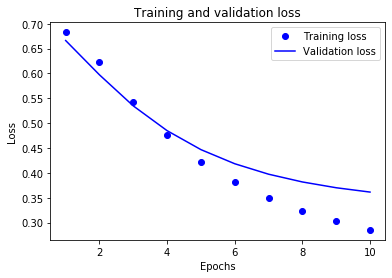

In [55]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

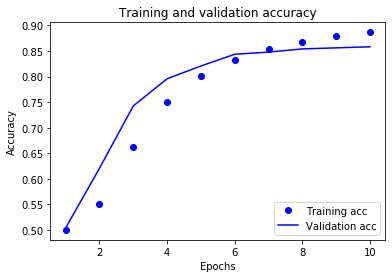

In [56]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Linear Model using Estimators
<a name="linear">

In [57]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [58]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [59]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
              ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [60]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\John\\AppData\\Local\\Temp\\tmp9e0r8vmc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A39CDD3C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\John\\AppData\\Local\\Temp\\tmp9e0r8vmc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A39CDD3C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt.


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:global_step/sec: 237.13


INFO:tensorflow:global_step/sec: 237.13


INFO:tensorflow:loss = 0.47475964, step = 100 (0.423 sec)


INFO:tensorflow:loss = 0.47475964, step = 100 (0.423 sec)


INFO:tensorflow:Saving checkpoints for 200 into C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt.


INFO:tensorflow:Saving checkpoints for 200 into C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt.


INFO:tensorflow:Loss for final step: 0.4008675.


INFO:tensorflow:Loss for final step: 0.4008675.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-06-11T18:56:58Z


INFO:tensorflow:Starting evaluation at 2020-06-11T18:56:58Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt-200


INFO:tensorflow:Restoring parameters from C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-06-11-18:56:59


INFO:tensorflow:Finished evaluation at 2020-06-11-18:56:59


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7537879, accuracy_baseline = 0.625, auc = 0.8338843, auc_precision_recall = 0.77057034, average_loss = 0.47837472, global_step = 200, label/mean = 0.375, loss = 0.4707675, precision = 0.67346936, prediction/mean = 0.35967317, recall = 0.6666667


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7537879, accuracy_baseline = 0.625, auc = 0.8338843, auc_precision_recall = 0.77057034, average_loss = 0.47837472, global_step = 200, label/mean = 0.375, loss = 0.4707675, precision = 0.67346936, prediction/mean = 0.35967317, recall = 0.6666667


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt-200


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: C:\Users\John\AppData\Local\Temp\tmp9e0r8vmc\model.ckpt-200


{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.8338843, 'auc_precision_recall': 0.77057034, 'average_loss': 0.47837472, 'label/mean': 0.375, 'loss': 0.4707675, 'precision': 0.67346936, 'prediction/mean': 0.35967317, 'recall': 0.6666667, 'global_step': 200}


### Boosted Trees
<a name="boosted">

In [1]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

import tensorflow as tf
tf.random.set_seed(123)

In [2]:
fc = tf.feature_column
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

def one_hot_cat_column(feature_name, vocab):
      return fc.indicator_column(fc.categorical_column_with_vocabulary_list(feature_name,vocab))
    
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  # Need to one-hot encode categorical features.
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(fc.numeric_column(feature_name,
                                           dtype=tf.float32))

In [3]:
# Use entire batch since this is such a small dataset.
NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
        if shuffle:
          dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).
        dataset = (dataset
              .repeat(n_epochs)
              .batch(NUM_EXAMPLES))
        return dataset
    return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False, n_epochs=1)

In [ ]:
params = {
  'n_trees': 50,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, **params)
# Train model.
est.train(train_input_fn, max_steps=100)

# Evaluation.
results = est.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\John\\AppData\\Local\\Temp\\tmpnfs82k49', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AADE92F308>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
The old _FeatureColumn APIs are